In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('pizza.csv')

In [3]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [5]:
df['pizza_category'].value_counts()

pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64

In [6]:
df.describe

<bound method NDFrame.describe of        pizza_id  order_id  pizza_name_id  quantity  order_date order_time  \
0             1         1     hawaiian_m         1  01-01-2015   11:38:36   
1             2         2  classic_dlx_m         1  01-01-2015   11:57:40   
2             3         2  five_cheese_l         1  01-01-2015   11:57:40   
3             4         2    ital_supr_l         1  01-01-2015   11:57:40   
4             5         2     mexicana_m         1  01-01-2015   11:57:40   
...         ...       ...            ...       ...         ...        ...   
48615     48616     21348  ckn_alfredo_m         1  31-12-2015   21:23:10   
48616     48617     21348  four_cheese_l         1  31-12-2015   21:23:10   
48617     48618     21348   napolitana_s         1  31-12-2015   21:23:10   
48618     48619     21349     mexicana_l         1  31-12-2015   22:09:54   
48619     48620     21350      bbq_ckn_s         1  31-12-2015   23:02:05   

       unit_price  total_price pizza_size

In [49]:
dataset = df[['pizza_ingredients']]
dataset['pizza_ingredients'] = dataset['pizza_ingredients'].str.split(',')
dataset.head()

C:\Users\Parmar\AppData\Local\Temp\ipykernel_7004\4129614993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['pizza_ingredients'] = dataset['pizza_ingredients'].str.split(',')


,pizza_ingredients
0,"[Sliced Ham, Pineapple, Mozzarella Cheese]"
1,"[Pepperoni, Mushrooms, Red Onions, Red Pepp..."
2,"[Mozzarella Cheese, Provolone Cheese, Smoked..."
3,"[Calabrese Salami, Capocollo, Tomatoes, Red..."
4,"[Tomatoes, Red Peppers, Jalapeno Peppers, R..."


In [37]:
support = (dataset['pizza_ingredients'].value_counts()/48620*100)
support

pizza_ingredients
[Pepperoni,  Mushrooms,  Red Onions,  Red Peppers,  Bacon]                                                  4.969148
[Barbecued Chicken,  Red Peppers,  Green Peppers,  Tomatoes,  Red Onions,  Barbecue Sauce]                  4.878651
[Sliced Ham,  Pineapple,  Mozzarella Cheese]                                                                4.874537
[Mozzarella Cheese,  Pepperoni]                                                                             4.872480
[Chicken,  Pineapple,  Tomatoes,  Red Peppers,  Thai Sweet Chilli Sauce]                                    4.761415
[Chicken,  Artichoke,  Spinach,  Garlic,  Jalapeno Peppers,  Fontina Cheese,  Gouda Cheese]                 4.734677
[Coarse Sicilian Salami,  Tomatoes,  Green Olives,  Luganega Sausage,  Onions,  Garlic]                     3.881119
[Capocollo,  Tomatoes,  Goat Cheese,  Artichokes,  Peperoncini verdi,  Garlic]                              3.881119
[Chicken,  Tomatoes,  Red Peppers,  Red Onions

In [57]:
all_ingredients = []

# Flatten the list of lists into a single list
for ingredients_list in dataset['pizza_ingredients']:
    all_ingredients.extend(ingredients_list)

# Count the occurrences of each ingredient
ingredient_counts = pd.Series(all_ingredients).value_counts()

# Now you have a Series with ingredient counts
print(ingredient_counts)

 Garlic                27422
 Tomatoes              23694
 Red Onions            19547
 Red Peppers           16284
Chicken                 8443
                       ...  
Brie Carre Cheese        480
 Prosciutto              480
 Caramelized Onions      480
 Pears                   480
 Thyme                   480
Name: count, Length: 73, dtype: int64


<Axes: >

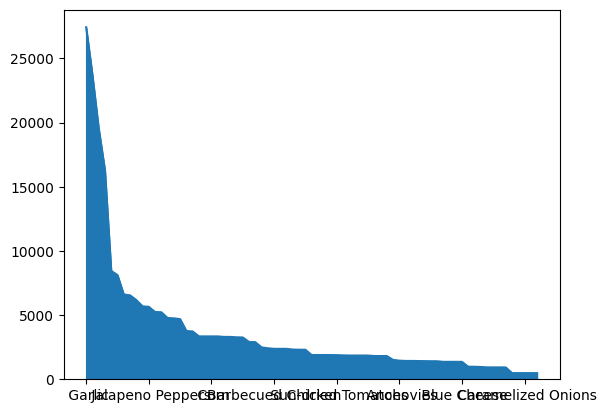

In [60]:
ingredient_counts.plot(kind='area')

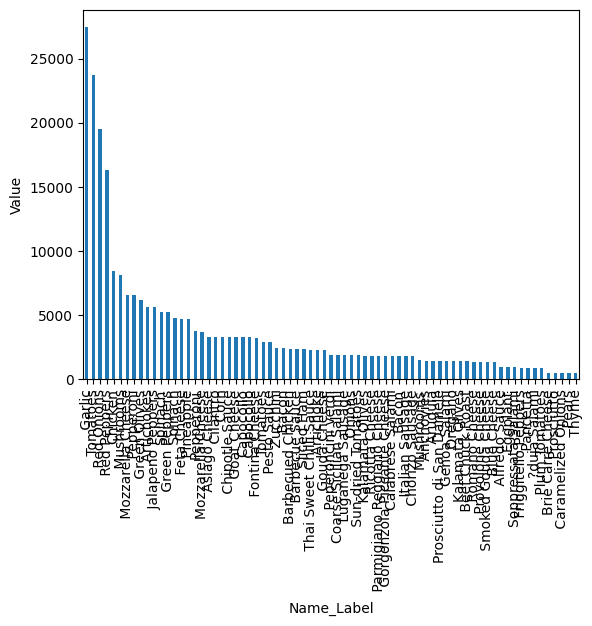

In [61]:
import matplotlib.pyplot as plt

# Create a bar plot with horizontal labels
ax = ingredient_counts.plot(x='Name_Label', kind='bar', legend=False)
plt.xlabel('Name_Label')
plt.ylabel('Value')

# Rotate x-axis labels to be vertical
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [65]:
median = ingredient_counts.median()
median

1887.0

In [71]:
filtered_ingredients = ingredient_counts[ingredient_counts >= 1887]

print(filtered_ingredients)

 Garlic                     27422
 Tomatoes                   23694
 Red Onions                 19547
 Red Peppers                16284
Chicken                      8443
 Mushrooms                   8114
 Mozzarella Cheese           6605
 Pepperoni                   6542
 Green Olives                6174
 Artichokes                  5682
 Jalapeno Peppers            5643
Spinach                      5239
 Green Peppers               5224
 Spinach                     4773
 Feta Cheese                 4748
 Pineapple                   4685
Pepperoni                    3758
Mozzarella Cheese            3728
 Asiago Cheese               3342
 Cilantro                    3341
 Corn                        3341
 Chipotle Sauce              3341
 Goat Cheese                 3301
Capocollo                    3301
 Capocollo                   3271
 Fontina Cheese              3259
Tomatoes                     2907
 Pesto Sauce                 2893
 Zucchini                    2485
 Bacon        

In [76]:

from apyori import apriori